# Imports

In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from mlchecks.checks.performance import NaiveComparision
from mlchecks.base import Dataset

# Generating data:

In [2]:
iris = load_iris(as_frame=True)
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)
train_ds = Dataset(pd.concat([x_train, y_train], axis=1),
                   features=iris.feature_names,
                   label='target')
val_ds = Dataset(pd.concat([x_test, y_test], axis=1),
                 features=iris.feature_names,
                 label='target')
clf = AdaBoostClassifier()
clf.fit(x_train, y_train)

AdaBoostClassifier()

# Running naive_comparision check:

## Random model check:

In [3]:
check = NaiveComparision(native_model_type='random')

Naive Comparision

Summarize given metrics on a dataset and model.

Model prediction has achieved 4.60 times better Accuracy compared to Naive random prediction on tested data.

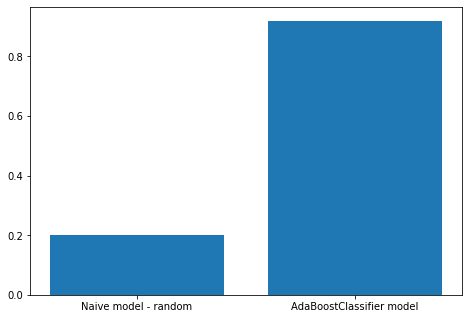

In [4]:
check.run(train_ds, val_ds, clf)

## Tree model check:

In [5]:
check = NaiveComparision(native_model_type='tree')

Naive Comparision

Summarize given metrics on a dataset and model.

Model prediction has achieved 0.96 times better Accuracy compared to Naive tree prediction on tested data.

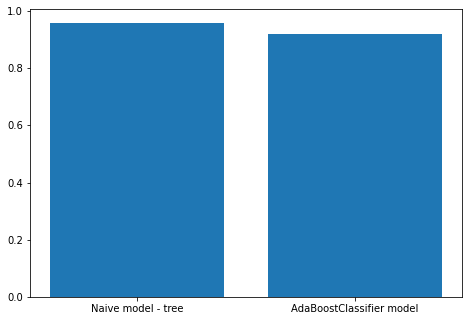

In [6]:
check.run(train_ds, val_ds, clf)